<a href="https://colab.research.google.com/github/Hirokazzz/DataScientistLab/blob/master/%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%A7Iris%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%88%86%E6%9E%90%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考文献：東京大学のデータサイエンティスト育成講座

### アイリスのクラス分類(決定木)

アイリスの花弁の長さと幅、ガクの長さと幅をセンチメートル単位で観測してアイリスの分類を行います。

In [1]:
# ライブラリの読み込み
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sys

### データの読み込み
irisのデータセットはsklearn.datasetsから読み込む

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

読み込んだデータはBunchクラスのオブジェクトであり、辞書と同じ形式のオブジェクトでキーと値を持つ。

iris_dataset.keys()でキーの一覧を確認できる。

In [4]:
print("key of iris_dataset: \n{}".format(iris_dataset.keys()))

key of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### データ詳細の確認

In [5]:
# classはIris-Setosa　、Iris-Versicolour、 Iris-Virginicaだとわかる
print(iris_dataset.DESCR) 

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### 求めたいアイリスの種類の確認
target_nameには予測しようとしている花の名前が入っている。

花の種類は3種類で「setosa」、 「versicolor」、「virginica」であることがわかる。

In [6]:
print("アイリスの種類: {}".format(iris_dataset['target_names']))

アイリスの種類: ['setosa' 'versicolor' 'virginica']


#### 特徴量の名前とデータの確認
どのようなデータがどのような順番で入っているか確認するには iris_dataset['feature_names']で取得

* 「sepal length (cm)」:ガクの長さ
*「sepal width (cm)」 :ガクの幅
*「petal length (cm)」:花弁の長さ
*「petal width (cm)」:花弁の幅

それぞれの個別の値を一部確認するには iris_dataset['data'][:5]で取得。[:5]の5の値を変更すると、その数だけ確認できます。  
全て確認する場合は、iris_dataset['data'] で取得できます。

In [7]:
print("特徴量の名前: {}".format(iris_dataset['feature_names']))

特徴量の名前: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print("5件だけデータ表示: \n{}".format(iris_dataset['data'][:5]))

5件だけデータ表示: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


何行何列の行列になっているかはshapeで確認できます。

データが150用意されて、特徴量が4種類あることがわかる。

In [9]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


#### データ分布の状態を確認
targetはラベル（アイリスの種類を数値化した値）を見ることができます。  
これがつまり教師データになるものです。

ラベルを表示してみると0から2まで3種類のアイリスのデータがグループ分けされた状態になって格納されていることがわかります。

訓練データとテストデータを分割する場合このようなデータの並びになっていると、偏った学習をすることになります。そのため、ランダムにデータを分ける必要が出てきます。

In [10]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
iris_dataset['target'].shape

(150,)

### 訓練データとテストデータの分離


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
  iris_dataset['data'],iris_dataset['target'],random_state=0
)

分離取得したデータの配列の形状を確認します。

In [13]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


### 決定木
ハイパーパラメータ
- max-depth:木の高さを制限します。（枝刈り）指定しないと過学習になります。
- random_state:決定木を分類する値を決めると共に学習結果を保持するための乱数を作成するもの。
- criterion: gini、entropyを指定します。

In [17]:
from sklearn.tree import DecisionTreeClassifier

depth_list = [i for i in range(1, 11)]
accuracy = []

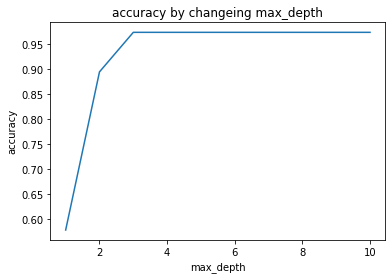

In [18]:
#max-depthの指定を複数の値で指定
for depth in range(1,11):
  model = DecisionTreeClassifier(max_depth = depth,random_state=0,criterion="gini")
  model.fit(X_train,y_train)
  accuracy.append(model.score(X_test,y_test))

#可視化
plt.plot(depth_list,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy by changeing max_depth')
plt.show()

In [19]:
model = DecisionTreeClassifier(max_depth=4,random_state=0,criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [20]:
y_pred = model.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [21]:
print("Train set score: {:.2f}".format(model.score(X_train,y_train)))

Train set score: 1.00


In [22]:
print("Test set score: {:.2f}".format(model.score(X_test,y_test)))

Test set score: 0.97


### 予測
野生のアイリスを見つけてガクと花弁の長さと幅を調べてその品種を予測する。

* ガクの長さ : 5センチ
* ガクの幅 : 2.9センチ
* 花弁の長さ : 1センチ
* 花弁の幅 : 0.2センチ

In [23]:
#お題の数値を配列にする
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape:{}".format(X_new.shape))

X_new.shape:(1, 4)


In [24]:
#モデルに入れてみる
prediction = model.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


In [25]:
# trainでの予測
y_pred_train = model.predict(X_train)
print("Test set predictions: \n {}".format(y_pred_train))

print('setosa:{}'.format(list(y_pred_train).count(0)))
print('versicolor:{}'.format(list(y_pred_train).count(1)))
print('virginica:{}'.format(list(y_pred_train).count(2)))

Test set predictions: 
 [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]
setosa:37
versicolor:34
virginica:41


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


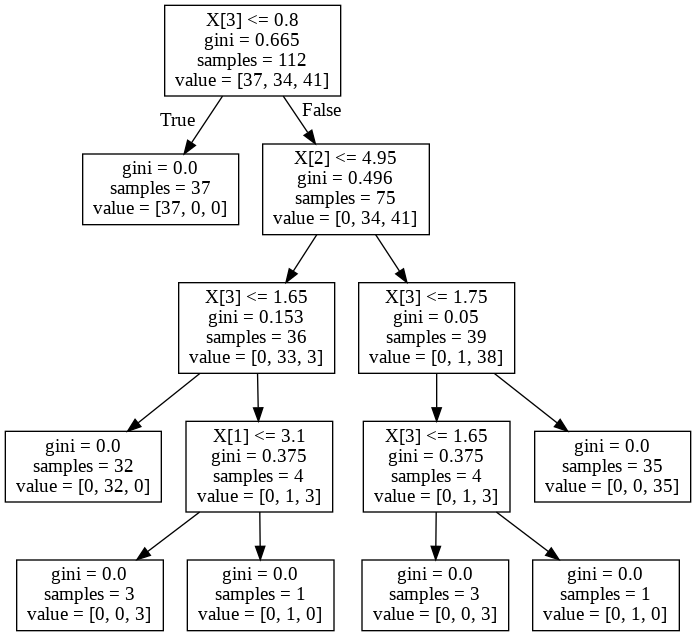

In [26]:
# ツリーの可視化
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  